In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('kaggle/input/quant-fin/train.csv')
test_data = pd.read_csv('test.csv')
solution = pd.read_csv('solution.csv')

In [58]:
df = solution.copy()

df['rsi_sig_num'] = df['rsi_sig'].apply(action_to_value)
df['stoch_sig_num'] = df['stoch_sig'].apply(action_to_value)
df['ichi_sig_num'] = df['ichi_sig'].apply(action_to_value)
df['fibo_sig_num'] = df['fibo_sig'].apply(action_to_value)
df['boll_sig_num'] = df['boll_sig'].apply(action_to_value)

df.drop(['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch'], axis=1, inplace=True)
df

,vwap_short,resist3,stoch_k,vwap_long,support3,stoch_k_sm,boll_up,stoch_d,boll_low,macd_rel,...,support1,ichi_base,resist2,ichi_b,macd_hist_rel,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,3.012007e-06,2.95,50.000000,3.505270e-06,-3.65,53.333333,0.006619,66.666667,-0.005526,0.000393,...,-1.02,-0.093234,1.30,-0.586042,-0.999545,1,0,0,0,1
1,-1.267680e-07,8.66,32.352941,-2.350763e-09,-7.17,60.163055,0.011172,171.403509,-0.014650,-0.001292,...,-1.22,0.141900,4.71,1.312574,-1.000449,1,0,0,0,1
2,-8.845986e-05,6.03,100.000000,2.349245e-06,-6.71,90.000000,0.009963,50.000000,-0.005366,0.000576,...,-1.58,-0.318471,2.84,-0.318471,-0.997891,1,0,0,0,1
3,9.680215e-06,3.12,5.128205,-3.269156e-05,-1.81,43.592223,0.000860,197.448292,-0.006777,-0.000795,...,0.11,0.274123,1.89,0.774397,-1.002316,0,0,0,0,1
4,4.657523e-02,11.30,100.000000,-3.580950e-03,-9.68,140.000000,0.017641,300.000000,-0.013137,0.001075,...,-1.50,-0.405743,6.05,0.717853,-0.997918,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.411642e-04,4.65,66.197183,2.116666e-06,-4.51,96.824284,0.009556,219.332688,-0.002007,0.002366,...,-1.09,-0.320513,2.36,0.123932,-0.997577,0,0,0,0,1
338,1.213555e-02,3.44,47.619048,-5.218235e-01,-2.46,78.333956,0.000937,201.193589,-0.005558,-0.001268,...,-0.04,0.167070,1.96,0.593386,-1.001016,1,0,0,0,1
339,1.255803e-06,2.19,50.000000,4.694592e-07,-2.20,53.333333,0.004644,66.666667,-0.004864,-0.000955,...,-0.45,0.109890,1.10,-0.109890,-0.999953,1,0,0,0,1
340,-3.075177e-06,2.70,22.018349,2.512962e-06,-3.26,46.848486,0.006307,146.169036,-0.006390,0.001526,...,-1.25,-0.184097,1.21,-0.034045,-0.999627,1,0,0,0,1


In [3]:
train_data

,rsi_sig,vwap_short,resist3,stoch_k,vwap_long,support3,fibo_sig,result,stoch_k_sm,boll_up,...,support2,atr,resist1,ema_rel,support1,ichi_base,exch,resist2,ichi_b,macd_hist_rel
0,Hold,3.135142e-04,32.11,5.115713,-9.398346e-05,-24.93,Sell,0,41.644171,0.005576,...,-10.67,2.527333e-03,9.50,1.026437,-4.76,2.722192,BC,17.85,5.110871,-1.027237
1,Sell,0.000000e+00,5.60,85.714286,1.585063e-06,-6.44,Buy,1,113.015873,0.017626,...,-3.43,2.066667e-04,1.37,0.995089,-1.64,-1.103310,BB,2.59,-0.451354,-0.993209
2,Hold,0.000000e+00,1.30,50.000000,0.000000e+00,-1.30,Sell,1,46.666667,0.002156,...,-0.65,5.333333e-06,0.28,1.000046,-0.37,-0.061000,BB,0.65,-0.020333,-0.999840
3,Hold,-8.791675e-05,2.30,71.428571,-3.290121e-07,-2.27,Sell,1,114.920635,0.004187,...,-1.13,2.066667e-03,0.60,0.999847,-0.54,-0.204248,BC,1.16,-0.040850,-0.999806
4,Buy,-3.337844e-06,1.37,9.090909,-3.157212e-07,-1.03,Sell,1,37.272727,0.000846,...,-0.43,1.866667e-04,0.45,1.000930,-0.15,0.168413,OK,0.77,0.168413,-1.001124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366027,Hold,-1.348761e-06,6.46,53.703704,-1.053290e-06,-4.39,Buy,1,82.329329,0.004508,...,-1.68,1.040000e-04,2.80,1.000673,0.09,0.012553,OK,3.75,1.418529,-1.001583
1366028,Hold,-9.668487e-05,7.22,11.111111,-1.792200e-05,-6.07,Sell,1,48.515152,0.005366,...,-2.75,4.800000e-03,1.86,1.002135,-1.46,0.051125,BC,3.90,1.380368,-1.000936
1366029,Hold,-9.667569e-03,4.60,24.074074,7.730083e-05,-4.89,Buy,0,56.133921,0.007150,...,-2.52,1.913333e-01,1.18,1.000411,-1.19,-0.129881,OK,2.23,-0.121502,-0.999826
1366030,Hold,3.072779e-05,5.99,87.500000,3.069078e-06,-5.61,Buy,1,99.968003,0.009991,...,-2.71,1.100000e-03,1.82,0.998696,-1.08,-0.524948,HB,3.09,0.613306,-0.997951


In [19]:
signals = train_data[['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch', 'result']]
signals

,rsi_sig,stoch_sig,ichi_sig,fibo_sig,boll_sig,exch,result
0,Hold,Sell,Sell,Sell,Hold,BC,0
1,Sell,Sell,Sell,Buy,Hold,BB,1
2,Hold,Buy,Sell,Sell,Hold,BB,1
3,Hold,Sell,Buy,Sell,Hold,BC,1
4,Buy,Sell,Buy,Sell,Hold,OK,1
...,...,...,...,...,...,...,...
1366027,Hold,Sell,Sell,Buy,Hold,OK,1
1366028,Hold,Sell,Sell,Sell,Hold,BC,1
1366029,Hold,Sell,Buy,Buy,Hold,OK,0
1366030,Hold,Sell,Sell,Buy,Hold,HB,1


In [21]:
def action_to_value(action):
    if action == 'Hold':
        return 1
    elif action in ['Sell', 'Buy']:
        return 0
    
signals['rsi_sig_num'] = signals['rsi_sig'].apply(action_to_value)
signals['stoch_sig_num'] = signals['stoch_sig'].apply(action_to_value)
signals['ichi_sig_num'] = signals['ichi_sig'].apply(action_to_value)
signals['fibo_sig_num'] = signals['fibo_sig'].apply(action_to_value)
signals['boll_sig_num'] = signals['boll_sig'].apply(action_to_value)
signals

C:\Users\ptesh\AppData\Local\Temp\ipykernel_39324\4062024282.py:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['rsi_sig_num'] = signals['rsi_sig'].apply(action_to_value)

C:\Users\ptesh\AppData\Local\Temp\ipykernel_39324\4062024282.py:8: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['stoch_sig_num'] = signals['stoch_sig'].apply(action_to_value)

C:\Users\ptesh\AppData\Local\Temp\ipykernel_39324\4062024282.py:9: SettingWithCopyWarning: 

A value is trying to be set on a copy of a 

,rsi_sig,stoch_sig,ichi_sig,fibo_sig,boll_sig,exch,result,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,Hold,Sell,Sell,Sell,Hold,BC,0,1,0,0,0,1
1,Sell,Sell,Sell,Buy,Hold,BB,1,0,0,0,0,1
2,Hold,Buy,Sell,Sell,Hold,BB,1,1,0,0,0,1
3,Hold,Sell,Buy,Sell,Hold,BC,1,1,0,0,0,1
4,Buy,Sell,Buy,Sell,Hold,OK,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1366027,Hold,Sell,Sell,Buy,Hold,OK,1,1,0,0,0,1
1366028,Hold,Sell,Sell,Sell,Hold,BC,1,1,0,0,0,1
1366029,Hold,Sell,Buy,Buy,Hold,OK,0,1,0,0,0,1
1366030,Hold,Sell,Sell,Buy,Hold,HB,1,1,0,0,0,1


In [22]:
corr_sig = signals.select_dtypes(include='number').corr()['result']
corr_sig

result           1.000000
rsi_sig_num      0.023142
stoch_sig_num    0.033990
ichi_sig_num     0.015326
fibo_sig_num     0.018370
boll_sig_num     0.087793
Name: result, dtype: float64

In [23]:
signals.select_dtypes(include='number').corr()

,result,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
result,1.000000,0.023142,0.033990,0.015326,0.018370,0.087793
rsi_sig_num,0.023142,1.000000,-0.112436,0.011489,-0.021308,0.340441
stoch_sig_num,0.033990,-0.112436,1.000000,0.060007,0.186255,-0.000848
ichi_sig_num,0.015326,0.011489,0.060007,1.000000,0.034382,-0.004405
fibo_sig_num,0.018370,-0.021308,0.186255,0.034382,1.000000,0.021926
boll_sig_num,0.087793,0.340441,-0.000848,-0.004405,0.021926,1.000000


In [26]:
signals_num = signals.select_dtypes(include='number')
signals_num.drop('result', axis=1, inplace=True)
signals_num

,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,1,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1366027,1,0,0,0,1
1366028,1,0,0,0,1
1366029,1,0,0,0,1
1366030,1,0,0,0,1


In [44]:
train = train_data.select_dtypes(include='number').join(signals_num)
train

,vwap_short,resist3,stoch_k,vwap_long,support3,result,stoch_k_sm,boll_up,stoch_d,boll_low,...,support1,ichi_base,resist2,ichi_b,macd_hist_rel,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,3.135142e-04,32.11,5.115713,-9.398346e-05,-24.93,0,41.644171,0.005576,187.758006,-0.067957,...,-4.76,2.722192,17.85,5.110871,-1.027237,1,0,0,0,1
1,0.000000e+00,5.60,85.714286,1.585063e-06,-6.44,1,113.015873,0.017626,222.222222,-0.000632,...,-1.64,-1.103310,2.59,-0.451354,-0.993209,0,0,0,0,1
2,0.000000e+00,1.30,50.000000,0.000000e+00,-1.30,1,46.666667,0.002156,33.333333,-0.001505,...,-0.37,-0.061000,0.65,-0.020333,-0.999840,1,0,0,0,1
3,-8.791675e-05,2.30,71.428571,-3.290121e-07,-2.27,1,114.920635,0.004187,288.888889,-0.002797,...,-0.54,-0.204248,1.16,-0.040850,-0.999806,1,0,0,0,1
4,-3.337844e-06,1.37,9.090909,-3.157212e-07,-1.03,1,37.272727,0.000846,150.000000,-0.004172,...,-0.15,0.168413,0.77,0.168413,-1.001124,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366027,-1.348761e-06,6.46,53.703704,-1.053290e-06,-4.39,1,82.329329,0.004508,196.831832,-0.008192,...,0.09,0.012553,3.75,1.418529,-1.001583,1,0,0,0,1
1366028,-9.668487e-05,7.22,11.111111,-1.792200e-05,-6.07,1,48.515152,0.005366,198.131313,-0.008683,...,-1.46,0.051125,3.90,1.380368,-1.000936,1,0,0,0,1
1366029,-9.667569e-03,4.60,24.074074,7.730083e-05,-4.89,0,56.133921,0.007150,184.373307,-0.007913,...,-1.19,-0.129881,2.23,-0.121502,-0.999826,1,0,0,0,1
1366030,3.072779e-05,5.99,87.500000,3.069078e-06,-5.61,1,99.968003,0.009991,149.840015,-0.005449,...,-1.08,-0.524948,3.09,0.613306,-0.997951,1,0,0,0,1


In [50]:
y_train = train.result
X_train = train.copy()
X_train.drop('result', axis = 1, inplace=True)
y_train

0          0
1          1
2          1
3          1
4          1
          ..
1366027    1
1366028    1
1366029    0
1366030    1
1366031    0
Name: result, Length: 1366032, dtype: int64

In [54]:
test = test_data.copy()

test['rsi_sig_num'] = test['rsi_sig'].apply(action_to_value)
test['stoch_sig_num'] = test['stoch_sig'].apply(action_to_value)
test['ichi_sig_num'] = test['ichi_sig'].apply(action_to_value)
test['fibo_sig_num'] = test['fibo_sig'].apply(action_to_value)
test['boll_sig_num'] = test['boll_sig'].apply(action_to_value)

test.drop(['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch'], axis=1, inplace=True)

y_test = test.result
X_test = test.copy()
X_test.drop('result', axis = 1, inplace=True)
y_test

0          0
1          1
2          1
3          1
4          1
          ..
1366027    1
1366028    1
1366029    0
1366030    1
1366031    0
Name: result, Length: 1366032, dtype: int64

In [55]:
X_test

,vwap_short,resist3,stoch_k,vwap_long,support3,stoch_k_sm,boll_up,stoch_d,boll_low,macd_rel,...,support1,ichi_base,resist2,ichi_b,macd_hist_rel,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,-0.000005,1.18,87.500000,0.000000e+00,-1.49,103.333333,0.002547,166.666667,-0.000486,0.000475,...,-0.45,-0.092277,0.51,-0.134867,-0.999280,1,0,0,0,1
1,0.000936,7.26,66.666667,6.491290e-05,-9.33,106.481481,0.006495,265.740741,-0.003220,0.001574,...,-2.32,-0.210970,3.11,-1.828411,-0.998883,1,0,0,0,1
2,0.000000,5.94,86.206897,0.000000e+00,-4.63,80.711549,0.008489,58.730159,-0.007241,0.000240,...,-0.72,0.024450,3.29,0.892421,-0.999766,1,0,0,0,1
3,0.000000,1.19,100.000000,8.314575e-08,-2.04,86.666667,0.004808,33.333333,-0.000063,0.000744,...,-0.85,-0.269623,0.38,-0.419413,-0.997895,0,0,0,0,1
4,0.000033,22.11,83.720930,-1.675936e-05,-16.52,107.135868,0.020326,200.795621,-0.013418,0.000722,...,-0.74,-0.675597,12.45,4.274898,-0.997575,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341161,0.000130,3.03,13.600000,-1.998851e-04,-1.97,30.951225,0.002213,100.356125,-0.004950,-0.000903,...,-0.14,0.172329,1.78,0.509746,-1.001052,0,0,0,0,1
341162,-0.000141,11.42,59.793814,-1.494860e-04,-9.46,72.634837,0.015706,123.998928,-0.017352,0.000376,...,-2.36,-0.038847,6.20,2.505633,-1.000988,1,0,0,0,1
341163,-0.000014,3.32,62.068966,1.717077e-05,-5.37,86.570516,0.007630,184.576720,-0.000503,0.002973,...,-2.51,-0.271512,1.15,-1.232247,-0.997460,1,0,0,0,1
341164,0.000005,2.90,16.666667,1.923940e-06,-3.46,26.274510,0.003680,64.705882,-0.005535,-0.000047,...,-0.95,0.092240,1.31,-0.568317,-1.000446,1,0,0,0,1


## 1. KNN

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [56]:
knn_model.score(X_test, y_test)

0.9037917025729411

In [59]:
knn_pred = knn_model.predict(df)
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## 2. RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=40, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=40)

In [66]:
rf_model.score(X_test.head(342), y_test.head(342))

0.9122807017543859

In [67]:
rf_predict = rf_model.predict(df)
rf_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## 3. DecisionTree

In [64]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_model.fit(X_train.head(650000), y_train.head(650000))

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [65]:
decision_model.score(X_test, y_test)

0.9023202781050866

## 4. Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train.head(650000), y_train.head(650000))  

GaussianNB()

In [71]:
naive_model.score(X_test, y_test)

0.906922143472679

## 5. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train.head(650000), y_train.head(650000))

In [ ]:
svm_model.score(X_test, y_test)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1366032 entries, 0 to 1366031

Data columns (total 39 columns):

 #   Column         Non-Null Count    Dtype  

---  ------         --------------    -----  

 0   rsi_sig        1366032 non-null  object 

 1   vwap_short     1366032 non-null  float64

 2   resist3        1366032 non-null  float64

 3   stoch_k        1366032 non-null  float64

 4   vwap_long      1366032 non-null  float64

 5   support3       1366032 non-null  float64

 6   fibo_sig       1366032 non-null  object 

 7   result         1366032 non-null  int64  

 8   stoch_k_sm     1366032 non-null  float64

 9   boll_up        1366032 non-null  float64

 10  stoch_d        1366032 non-null  float64

 11  ichi_sig       1366032 non-null  object 

 12  boll_low       1366032 non-null  float64

 13  stoch_sig      1366032 non-null  object 

 14  macd_rel       1366032 non-null  float64

 15  pivot_pt       1366032 non-null  float64

 16  macd_sig_rel   1366032 non-null  

C:\Users\ptesh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.

  fig.canvas.print_figure(bytes_io, **kw)


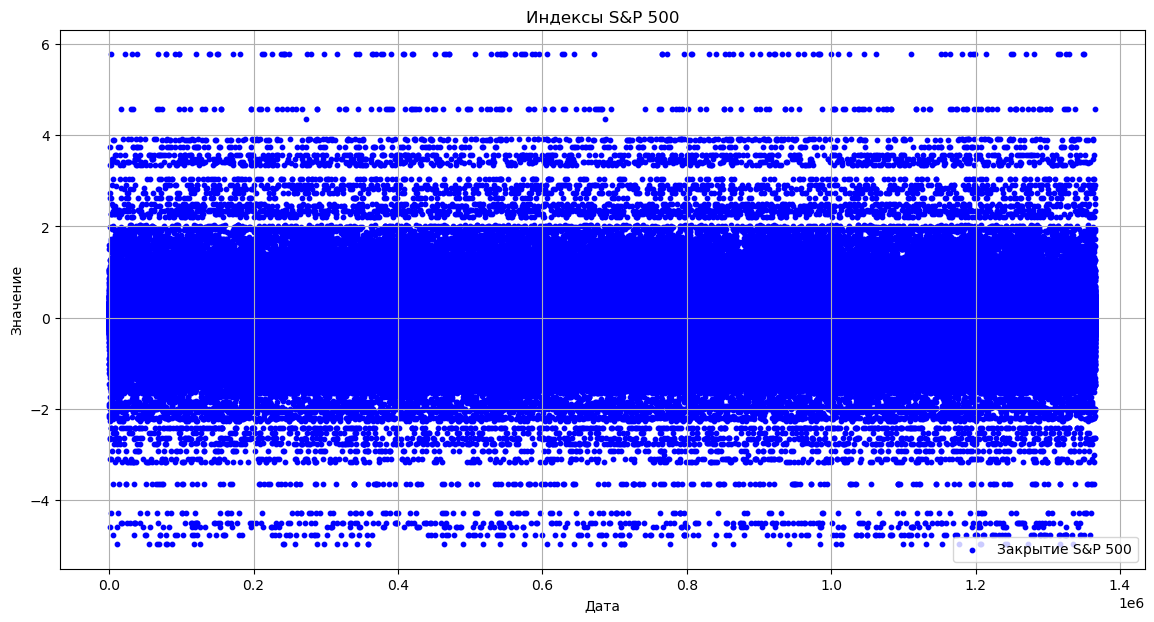

In [8]:
plt.figure(figsize=(14,7))
plt.scatter(train_data.index, train_data['s&p500'], label='Закрытие S&P 500', color='blue', s=10)
# plt.plot(train_data['s&p500'], label='Закрытие S&P 500', color='blue')
plt.title('Индексы S&P 500')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

In [11]:
corr_list = train_data.select_dtypes(include='number').corr()['result']
corr_list

vwap_short      -0.001761
resist3         -0.053930
stoch_k         -0.005078
vwap_long       -0.004174
support3         0.061233
result           1.000000
stoch_k_sm      -0.049617
boll_up         -0.052756
stoch_d         -0.103777
boll_low         0.045474
macd_rel        -0.041918
pivot_pt         0.023449
macd_sig_rel     0.028293
wma_rel         -0.035312
stoch_sig_val    0.103876
s&p500          -0.006502
ichi_a           0.043281
adx             -0.019698
ichi_conv        0.015475
ma_rel           0.034114
sma_rel         -0.039228
rsi             -0.027807
sar_rel          0.027876
macd            -0.005593
support2         0.065157
atr             -0.015238
resist1         -0.103979
ema_rel          0.032552
support1         0.040552
ichi_base        0.019269
resist2         -0.050569
ichi_b           0.005433
macd_hist_rel   -0.043159
Name: result, dtype: float64

In [14]:
corr_df = corr_list.to_frame()
corr_df = corr_df[abs(corr_df['result']) > 0.1]
corr_df

,result
result,1.000000
stoch_d,-0.103777
stoch_sig_val,0.103876
resist1,-0.103979


In [3]:
train_data.result.value_counts()

1    1216877
0     149155
Name: result, dtype: int64

In [4]:
test_data.result.value_counts()

1    303626
0     37540
Name: result, dtype: int64

In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1366032 entries, 0 to 1366031

Data columns (total 39 columns):

 #   Column         Non-Null Count    Dtype  

---  ------         --------------    -----  

 0   rsi_sig        1366032 non-null  object 

 1   vwap_short     1366032 non-null  float64

 2   resist3        1366032 non-null  float64

 3   stoch_k        1366032 non-null  float64

 4   vwap_long      1366032 non-null  float64

 5   support3       1366032 non-null  float64

 6   fibo_sig       1366032 non-null  object 

 7   result         1366032 non-null  int64  

 8   stoch_k_sm     1366032 non-null  float64

 9   boll_up        1366032 non-null  float64

 10  stoch_d        1366032 non-null  float64

 11  ichi_sig       1366032 non-null  object 

 12  boll_low       1366032 non-null  float64

 13  stoch_sig      1366032 non-null  object 

 14  macd_rel       1366032 non-null  float64

 15  pivot_pt       1366032 non-null  float64

 16  macd_sig_rel   1366032 non-null  

In [4]:
submission = pd.DataFrame({'ID':solution.index})
submission['result'] = rf_predict
submission

,ID,result
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
337,337,1
338,338,1
339,339,1
340,340,1


In [5]:
submission.to_csv('rf_submission.csv',index=False)

In [3]:
rf_predict = np.array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])